<h1><center>Creating a Neural Network From Scratch</center></h1>

### Import Modules

In [1638]:
%reset
import numpy as np
import pandas as pd
from scipy.io import loadmat
%matplotlib inline 
import matplotlib.pyplot as plt

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Import Data

In [1639]:
dataMat = loadmat("ex4data1.mat")
X = dataMat["X"]
y = dataMat["y"]

## Helper Functions

### One Vs All Y

In [1640]:
def one_vs_all(y, num_labels):
    tmp = np.eye(num_labels)
    y_k = tmp[y-1, :]
    return np.squeeze(y_k)

### Sigmoid

In [1641]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) 

### Sigmoid Gradient

In [1642]:
def sigmoidGrad(z):
    return sigmoid(z) * (1 - sigmoid(z))

### Make predictions

In [1643]:
def predict(Theta1, Theta2, X):
    # Number of training examples
    m = X.shape[0]
    # Number of labels
    num_labels = Theta2.shape[0]
    # Compute Hidden layer Activation
    h1 = sigmoid(np.append(np.ones((X.shape[0], 1)), X, axis=1) @ Theta1.transpose())
    # Compute Output Layer Activation
    h2 = sigmoid(np.append(np.ones((X.shape[0], 1)), h1, axis=1) @ Theta2.transpose())
    # Return the index (shifted over one) where the max value is
    return np.argmax(h2, axis=1) + 1

## Core Neural Network Functions

### Weight Initializer 

In [1644]:
def randInitializeWeights(L_in, L_out):
    epsilon_init = 0.12;
    return np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init;

### Gradient Descent 

In [1645]:
def gradient_descent(Theta1, Theta2, X, y, lam, alpha, num_iters, num_labels):
    
    # Initialize Cost History
    J_History = []
    
    # Get the number of examples
    m = X.shape[0]
    
    # Repeat for all the iterations
    for i in range(num_iters):
        
        # Calculate the cost and gradients
        [J, Theta1_grad, Theta2_grad] = cost(X, y, lam, num_labels, Theta1, Theta2)
        
        # Update thetas based on their respective gradients
        Theta1 = Theta1 - Theta1_grad * alpha
        Theta2 = Theta2 - Theta2_grad * alpha 
        
        # Append the cost to J_History
        J_History.append(J)
        
    return [J_History, Theta1, Theta2]

### Cost Function

In [1646]:
def cost(X, y, lam, num_labels, Theta1, Theta2):
    
    # Calculate Number of examples
    m = X.shape[0]

    # K is the number of outputs
    K = num_labels

    # Hot Encode Y
    y_k = one_vs_all(y, num_labels)

    # Feed Forward
    # Activation of First layer is just the inputs
    a1 = np.append(np.ones((m, 1)), X, axis=1)
    
    # Calculate activation of hidden layer
    z2 = np.dot(a1, Theta1.transpose())
    a2 = np.append(np.ones((z2.shape[0], 1)), sigmoid(z2), axis=1)

    # Calculate activation of output layer
    z3 = np.dot(a2, Theta2.transpose())
    a3 = sigmoid(z3)
    
    # Our hypothesis is just the activation of the output layer
    h = a3

    # Calculate Penalty
    p = np.sum(np.sum(np.square(Theta1[:, 1:]), axis=1)) + np.sum(np.sum(np.square(Theta2[:, 1:]), axis=1))

    # Calculate Cost
    J = (1/m) * np.sum(np.sum(-y_k * np.log(h) - (1 - y_k) * np.log(1-h), axis=1)) + (lam * p)/ (2 * m)

    # Calculate Deltas (Backpropogate)
    # Error of output layer
    delta3 = a3 - y_k
    
    # Calculate error of hidden layer
    delta2 = delta3 @ Theta2 * sigmoidGrad(np.append(np.ones((z2.shape[0], 1)), z2, axis=1))

    # Remove bias node from hidden layer
    delta2 = delta2[:, 1:]

    # Calculate Total Error
    Delta1 = delta2.transpose() @ a1
    Delta2 = delta3.transpose() @ a2

    # Calculate gradients for Theta1 and Theta2
    Theta1_grad = (1 / m) * Delta1 + (lam / m) * np.append(np.zeros((Theta1.shape[0],1)), Theta1[:, 1:], axis=1)
    Theta2_grad = (1 / m) * Delta2 + (lam / m) * np.append(np.zeros((Theta2.shape[0],1)), Theta2[:, 1:], axis=1)

    return [J, Theta1_grad, Theta2_grad]

### Initialize Neural Network Hyperparameters

Learning Rate

In [1647]:
alpha = .2

Number of iterations

In [1648]:
num_iters = 1500

Regularization Constant

In [1649]:
lam = 10

In [1650]:
num_labels = 10

### Initialize Weights

In [1651]:
initial_Theta1 = randInitializeWeights(400, 25)
initial_Theta2 = randInitializeWeights(25, 10)

## Train Neural Network

### Perform Gradient Descent

In [1652]:
[J_History, Theta1, Theta2] = gradient_descent(initial_Theta1, initial_Theta2, X, y, lam, alpha,
                                               num_iters, num_labels)

### Plot Cost Function

Final Cost After Training: 1.1364479179773552


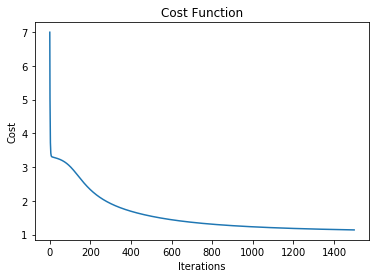

In [1653]:
plt.plot(J_History)
plt.title("Cost Function")
plt.ylabel("Cost")
plt.xlabel("Iterations")
print("Final Cost After Training:", J_History[-1])


### Make predictions and evaluate accuracy

In [1654]:
p = predict(Theta1, Theta2, X)
print("Neural Network Accuracy: " + str(np.mean(p == np.squeeze(y)) * 100) + "%")

Neural Network Accuracy: 90.8%
